# Проект - Разведывательный анализ данных (EDA) для модели предсказывания результатов экзаменов по математике

## Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Подключаем необходимые для расчетов библиотеки python, загружаем датасет

In [904]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

## Описание столбцов датасета stud (из описания задания):
0 school — аббревиатура школы, в которой учится ученик

1 sex — пол ученика ('F' - женский, 'M' - мужской)

2 age — возраст ученика (от 15 до 22)

3 address — тип адреса ученика ('U' - городской, 'R' - за городом)

4 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

5 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

6 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - 
высшее)

7 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

9 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

11 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

12 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

13 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

14 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

15 schoolsup — дополнительная образовательная поддержка (yes или no)

16 famsup — семейная образовательная поддержка (yes или no)

17 paid — дополнительные платные занятия по математике (yes или no)

18 activities — дополнительные внеучебные занятия (yes или no)

19 nursery — посещал детский сад (yes или no)

20 studytime, granular - показатель (не описанный в задании) - имеет 4 значения: -3, -6, -9, -12

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

In [905]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Из stud.info() видно, что строк не 29 (как было дано в задании), а 30. Появился параметр - studytime, granular

Всего в датасете - 395 строк.

13 параметров (столбцов) - количественных 

17 параметров (столбцов) - номинативных

In [1]:
stud.columns = ['school', 'sex', 'age', 'address', 'famsize',
                'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 
                'reason', 'guardian', 'traveltime', 'studytime',
                'failures', 'schoolsup', 'famsup', 'paid',
                'activities', 'nursery', 'st_granular','higher',
                'internet', 'romantic', 'famrel', 'freetime',
                'goout', 'health', 'absences', 'score']
display(stud.head())

NameError: name 'stud' is not defined

## Функции для обработки данных

In [907]:
def nominat(col):
    """Функция действий для номинативных параметров"""
    stud[col] = stud[col].apply(lambda x:
                                None if str(x).strip() == '' else 
                                None if pd.isnull(str(x).strip()) else
                                None if str(x).strip() == 'nan' else
                                None if str(x).strip() == 'NaN' else
                                x)
    display(pd.DataFrame(stud[col].value_counts()))
    print('Уникальных значений:' # Число уникальных значений
          , (stud[col].nunique()))
    stud.loc[:, [col]].info()
    return


def quan(col):
    """Функция действий для количественных параметров"""
    stud[col].hist()
    print('Характеристики до работы над устранением потенциальных выбросов:')
    display(stud[col].describe())
    IQR = stud[col].quantile(0.75) - stud[col].quantile(0.25)  # расч. кварт.
    perc25 = stud[col].quantile(0.25)
    perc75 = stud[col].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), 
          '75-й перцентиль: {},'.format(perc75), 
          "IQR: {}, ".format(IQR), 
          "Границы выбросов: [{f}, {l}].".format(f = perc25 - 1.5 * IQR, 
                                                 l = perc75 + 1.5 * IQR))
    stud[col].loc[stud[col].between(perc25 - 1.5 * IQR, 
                                    perc75 + 1.5 * IQR)].hist(bins = 10,
                                                              label = 'IQR')
    plt.legend();
    plt.title('Гистограмма распределения "{}" после обработки'.format(col))
    stud_new = stud.loc[stud[col].between(perc25 - 1.5 * IQR, 
                                          perc75 + 1.5 * IQR)]
    print()
    print('Возможные хар-ки после работы над устранением пот. выбросов:')
    display(stud_new[col].describe())
    return stud_new[col]


def get_boxplot(column):
    """Функция для построения графиков распределения score 
    в зависимости от номин.парам."""
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x = column, y = 'score', 
                data = stud.loc[stud.loc[:, column].isin(
                    stud.loc[:, column].value_counts().index[:])],
                ax = ax)
    plt.xticks(rotation = 45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_stat_dif(column):
    """Функция для проведения теста Стьюдента с нулевой гипотезой,
    что распределение баллов (score) по номинат. парам. неразличимы"""
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0],
                              'score'], 
                        stud.loc[stud.loc[:, column] == comb[1],
                                 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учет поправки Бонферони
            print('Найдены стат. значимые различия для колонки', column)
            break
            


# Раздел I: Проведение первичного анализа данных по столбцам датасета (число пустых значений в каждом столбце указывать бессмысленно, так как при обработке данных, когда постепенно убираешь выбросы, их число изменяется)

## Столбец: 0. school (номинативный параметр) — аббревиатура школы, в которой учится ученик

In [908]:
nominat('school')

,school
GP,349
MS,46


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Вывод по столбцу 0. school: 2 уникальных значения; в 7 раз больше в датасете учеников из школы GP, чем из школы MS

## Столбец: 1. sex (номинативный параметр) — пол ученика ('F' - женский, 'M' - мужской)

In [909]:
nominat('sex')

,sex
F,208
M,187


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Вывод по столбцу 1. sex: 2 уникальных значения; в датасете  чуть больше девочек (чем мальчиков)

## Столбец: 2. age (количественный параметр) — возраст ученика (от 15 до 22)

Характеристики до работы над устранением потенциальных выбросов:


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].

Возможные характеристики после работы над устранением потенциальных выбросов:


count    394.000000
mean      16.682741
std        1.249267
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       21.000000
Name: age, dtype: float64

0      18
1      17
2      15
3      15
4      16
       ..
390    20
391    17
392    21
393    18
394    19
Name: age, Length: 394, dtype: int64

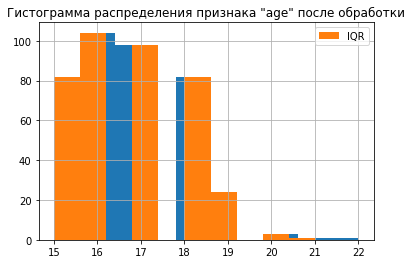

In [910]:
quan('age')

## Вывод по столбцу 2. age: в данных (по методу автоматического определения границ выбросов) имелся 1 выброс - 22 года. Однако, исходя из начальных условий и целей анализа, это значение нельзя убирать из датасета. Из гистограммы и характеристик видно, что медиана = 17

## Столбец: 3. address (номинативный параметр) — тип адреса ученика ('U' - городской, 'R' - за городом)

In [911]:
nominat('address')

,address
U,295
R,83


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Вывод по столбцу 3. address: 2 уникальных значения, в 3,5 раза больше учеников из городов 

## Столбец: 4. famsize (номинативный параметр) — размер семьи ('LE3' <= 3, 'GT3' >3)

In [912]:
nominat('famsize')

,famsize
GT3,261
LE3,107


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Вывод по столбцу 4. famsize: 2 уникальных значения, в 2,5 раза больше учеников из семей, где больше 3 человек в семье) 

## Столбец: 5. Pstatus (номинативный параметр) — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [913]:
nominat('Pstatus')

,Pstatus
T,314
A,36


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


## Вывод по столбцу 5. Pstatus: 2 уникальных значения, в 9 раз больше учеников из семей, где родители живут вместе) 

## Столбец: 6. Medu (количественный параметр) — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Характеристики до работы над устранением потенциальных выбросов:


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].

Возможные характеристики после работы над устранением потенциальных выбросов:


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

0      4.0
1      1.0
2      1.0
3      4.0
4      3.0
      ... 
390    2.0
391    3.0
392    1.0
393    3.0
394    1.0
Name: Medu, Length: 392, dtype: float64

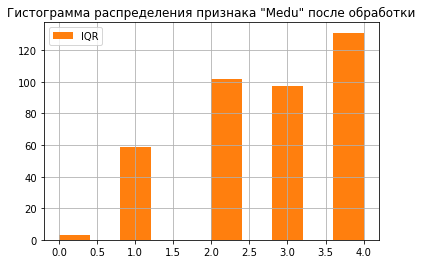

In [914]:
quan('Medu')

## Вывод по столбцу 6. Medu: Выбросов нет. Медиана - на значении 3.0.

## Столбец: 7. Fedu (количественный) — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Характеристики до работы над устранением потенциальных выбросов:


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].

Возможные характеристики после работы над устранением потенциальных выбросов:


count    368.000000
mean       2.527174
std        1.074511
min        1.000000
25%        2.000000
50%        2.500000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

0      4.0
1      1.0
2      1.0
3      2.0
4      3.0
      ... 
390    2.0
391    1.0
392    1.0
393    2.0
394    1.0
Name: Fedu, Length: 368, dtype: float64

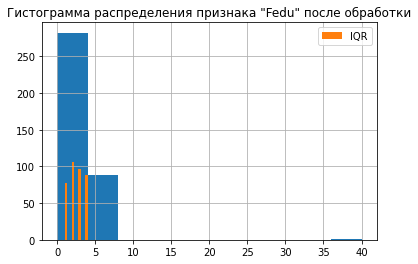

In [915]:
quan('Fedu')

In [916]:
stud = stud.loc[stud.Fedu <= 4]

## Вывод по столбцу 7. Fedu: 1 выброс - значение 40.0 - убрал из датасета. Автоматический метод определения выбросов показывал нижнюю границу: 0.5, но это нельзя использовать из-за того, что в датасете есть 3 значения со значением 0, которые важно учитывать. Поэтому применил свое условие для выбросов
(сравнивая столбец 6 и 7): У отцов самый частый результат - "2", а у матерей - "4". Видно, что у матерей меньше пустых значений, чем у отцов

## Столбец: 8. Mjob (номинативный параметр) — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [917]:
nominat('Mjob')

,Mjob
other,125
services,90
at_home,57
teacher,48
health,31


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    351 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## Вывод по столбцу 8. Mjob: 5 уникальных значений, треть матерей из сферы "other"

## Столбец: 9. Fjob (номинативный параметр) — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [918]:
nominat('Fjob')

,Fjob
other,189
services,94
teacher,26
at_home,14
health,13


Уникальных значений: 5
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    336 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## Вывод по столбцу 9. Fjob: 5 уникальных значений. Половина отцов из сферы "other"

## Столбец: 10. reason (номинативный параметр) — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [919]:
nominat('reason')

,reason
course,128
reputation,98
home,96
other,32


Уникальных значений: 4
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  354 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## Вывод по столбцу 10. reason: 4 уникальных значения. Около трети учеников выбрали школу по образовательной программе, репутация и близость к дому примерно одинаковые - причина четверти учеников по каждому.

## Столбец: 11. guardian (номинативный параметр)  — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [920]:
nominat('guardian')

,guardian
mother,236
father,78
other,26


Уникальных значений: 3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  340 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## Вывод по столбцу 11. guardian: 3 уникальных значений. У 60% учеников - мать является опекуном.

## Столбец: 12. traveltime (количественный) — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

Характеристики до работы над устранением потенциальных выбросов:


count    345.000000
mean       1.449275
std        0.701664
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].

Возможные характеристики после работы над устранением потенциальных выбросов:


count    338.000000
mean       1.396450
std        0.603835
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: traveltime, dtype: float64

0      2.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
390    1.0
391    2.0
392    1.0
393    3.0
394    1.0
Name: traveltime, Length: 338, dtype: float64

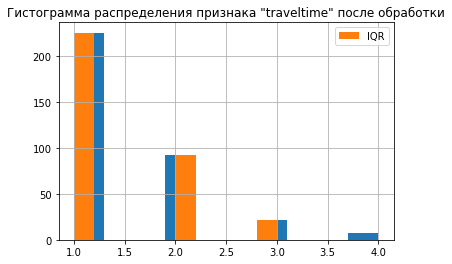

In [921]:
quan('traveltime')

## Вывод по столбцу 12. traveltime: Автоматическая система определения выбросов предлагает убрать из датасета строки со значением 4.0, чего делать нельзя. Большинство учеников добираются до школы менее чем за 15 минут. Медиана - 1.

## Столбец: 13. studytime (количественный) — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

Характеристики до работы над устранением потенциальных выбросов:


count    363.000000
mean       2.027548
std        0.840489
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].

Возможные характеристики после работы над устранением потенциальных выбросов:


count    338.000000
mean       1.881657
std        0.669971
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: studytime, dtype: float64

0      2.0
1      2.0
2      2.0
3      3.0
4      2.0
      ... 
390    2.0
391    1.0
392    1.0
393    1.0
394    1.0
Name: studytime, Length: 338, dtype: float64

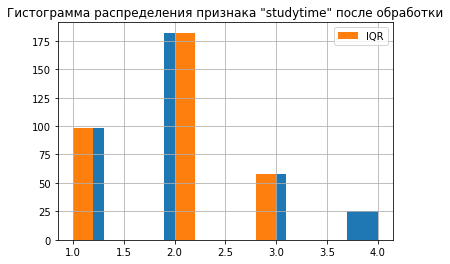

In [922]:
quan('studytime')

## Вывод по столбцу 13. studytime: Автоматическая система определения выбросов предлагает убрать из датасета строки со значением 4.0, чего делать нельзя. Около половины учеников тратят в неделю от 2 до 5 часов на учебу вне школы (медиана - 2).

## Столбец: 14. failures (количественный) — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

Характеристики до работы над устранением потенциальных выбросов:


count    351.000000
mean       0.336182
std        0.748962
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].

Возможные характеристики после работы над устранением потенциальных выбросов:


count    277.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: failures, dtype: float64

0      0.0
1      0.0
3      0.0
4      0.0
5      0.0
      ... 
386    0.0
388    0.0
391    0.0
393    0.0
394    0.0
Name: failures, Length: 277, dtype: float64

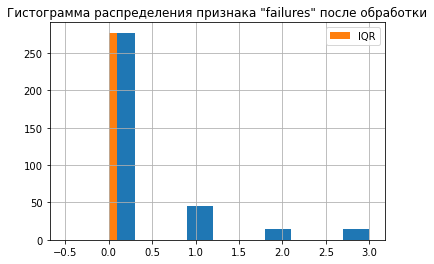

In [923]:
quan('failures')

## Вывод по столбцу 14. failures: Около 300 нулевых значений. Автоматическая система определения выбросов предлагает убрать из датасета все строки, кроме нулевых значений, чего делать нельзя.

## Столбец: 15. schoolsup (номинативный параметр) — дополнительная образовательная поддержка (yes или no)

In [924]:
nominat('schoolsup')

,schoolsup
no,314
yes,47


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  361 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## Вывод по столбцу 15. schoolsup: 2 уникальных значения. Только у восьмой части всех учеников есть доп. образовательная поддержка (по внесенным в датасет данным).

## Столбец: 16. famsup (номинативный параметр) — семейная образовательная поддержка (yes или no)

In [925]:
nominat('famsup')

,famsup
yes,204
no,131


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  335 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## Вывод по столбцу 16. famsup: 2 уникальных значения. "Да" к "Нет" относится примерно как 3 к 2

## Столбец: 17. paid (номинативный параметр) — дополнительные платные занятия по математике (yes или no)

In [926]:
nominat('paid')

,paid
no,188
yes,145


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    333 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## Вывод по столбцу 17. paid: 2 уникальных значения. "Да" к "Нет" относится примерно как 4 к 3

## Столбец: 18. activities: (номинативный параметр) — дополнительные внеучебные занятия (yes или no)

In [927]:
nominat('activities')

,activities
yes,180
no,176


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  356 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## Вывод по столбцу 18. activities: 2 уникальных значения. "Да" к "Нет" относится примерно как 1 к 1

## Столбец: 19. nursery: (номинативный параметр) — посещал детский сад (yes или no)

In [928]:
nominat('nursery')

,nursery
yes,279
no,75


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  354 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## Вывод по столбцу 19. nursery: 2 уникальных значения. "Да" к "Нет" относится примерно как 15 к 4

## Столбец: 20. "st_granular": (количественный) — могут быть 4 значения: -3, -6, -9, -12

Характеристики до работы над устранением потенциальных выбросов:


count    363.000000
mean      -6.082645
std        2.521466
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: st_granular, dtype: float64

25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].

Возможные характеристики после работы над устранением потенциальных выбросов:


count    338.000000
mean      -5.644970
std        2.009913
min       -9.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: st_granular, dtype: float64

0     -6.0
1     -6.0
2     -6.0
3     -9.0
4     -6.0
      ... 
390   -6.0
391   -3.0
392   -3.0
393   -3.0
394   -3.0
Name: st_granular, Length: 338, dtype: float64

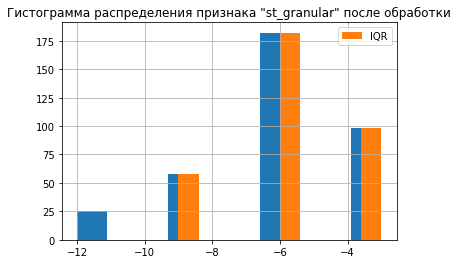

In [929]:
quan('st_granular')

## Вывод по столбцу 20. "st_granular": Автоматическая система определения выбросов предлагает убрать из датасета строки со значением -12.0, чего делать нельзя (больше 25 человек дали такой показатель). Около половины учеников имеют значение -6, это же значение является медианой.

## Столбец: 21. higher: (номинативный параметр) — хочет получить высшее образование (yes или no)

In [930]:
nominat('higher')

,higher
yes,333
no,19


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  352 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## Вывод по столбцу 21. higher: 2 уникальных значения. Большинство учеников собирается получать высшее образование.

## Столбец: 22. internet: (номинативный параметр) — наличие интернета дома (yes или no)

In [931]:
nominat('internet')

,internet
yes,283
no,54


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  337 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## Вывод по столбцу 22. internet: 2 уникальных значения. В 6 раз больше учеников с интернетом дома.

## Столбец: 23. romantic: (номинативный параметр) — в романтических отношениях (yes или no)

In [932]:
nominat('romantic')

,romantic
no,226
yes,116


Уникальных значений: 2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  342 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


## Вывод по столбцу 23. romantic: 2 уникальных значения. В 2 раза больше учеников, не находящихся в романтических отношениях.

## Столбец: 24. famrel: (количественный) — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

Характеристики до работы над устранением потенциальных выбросов:


count    346.000000
mean       3.936416
std        0.939629
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].

Возможные характеристики после работы над устранением потенциальных выбросов:


count    322.000000
mean       4.111801
std        0.683529
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

0      4.0
1      5.0
2      4.0
3      3.0
4      4.0
      ... 
388    4.0
390    5.0
392    5.0
393    4.0
394    3.0
Name: famrel, Length: 322, dtype: float64

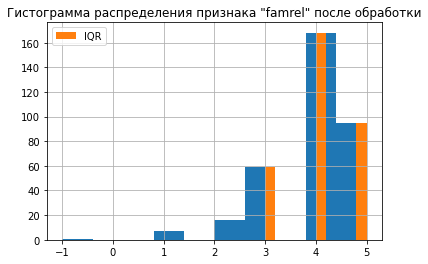

In [933]:
quan('famrel')

In [934]:
stud = stud.loc[stud.famrel >= 0]

## Вывод по столбцу 24. famrel: Автоматическая система определения выбросов предлагает убрать из датасета строки со значением меньшим "2.5" - чего делать нельзя (т.к. около 30 человек суммарно имеют значения: "1" и "2"). А значение: "-1" - действительно выброс, убираем его из датасета. Медиана: "4".

## Столбец: 25. freetime: (количественный) — свободное время после школы (от 1 - очень мало до 5 - очень мого)

Характеристики до работы над устранением потенциальных выбросов:


count    336.000000
mean       3.229167
std        1.003508
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].

Возможные характеристики после работы над устранением потенциальных выбросов:


count    319.000000
mean       3.347962
std        0.883774
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

0      3.0
1      3.0
2      3.0
3      2.0
4      3.0
      ... 
390    5.0
391    4.0
392    5.0
393    4.0
394    2.0
Name: freetime, Length: 319, dtype: float64

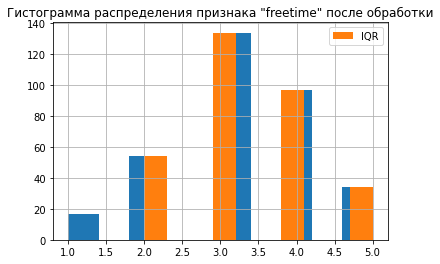

In [935]:
quan('freetime')

## Вывод по столбцу 25. freetime: Автоматическая система определения выбросов предлагает убрать из датасета строки со значением меньшим 1.5 - чего делать нельзя (т.к. около 20 человек имеют значение 1). Медиана: 3.

## Столбец: 26. goout: (количественный) — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

Характеристики до работы над устранением потенциальных выбросов:


count    337.000000
mean       3.106825
std        1.104852
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].

Возможные характеристики после работы над устранением потенциальных выбросов:


count    337.000000
mean       3.106825
std        1.104852
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

0      4.0
1      3.0
2      2.0
3      2.0
4      2.0
      ... 
390    4.0
391    5.0
392    3.0
393    1.0
394    3.0
Name: goout, Length: 337, dtype: float64

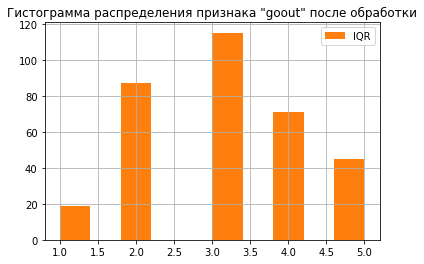

In [936]:
quan('goout')

## Вывод по столбцу 26. goout: Медиана: 3.

## Столбец: 27. health: (количественный) — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

Характеристики до работы над устранением потенциальных выбросов:


count    332.000000
mean       3.469880
std        1.386925
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].

Возможные характеристики после работы над устранением потенциальных выбросов:


count    332.000000
mean       3.469880
std        1.386925
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

0      3.0
1      3.0
2      3.0
3      5.0
4      5.0
      ... 
390    4.0
391    2.0
392    3.0
393    5.0
394    5.0
Name: health, Length: 332, dtype: float64

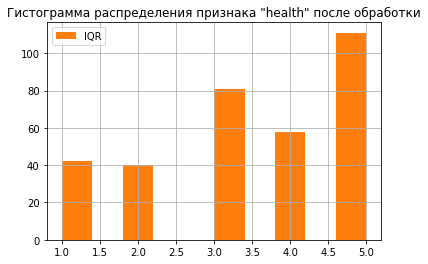

In [937]:
quan('health')

## Вывод по столбцу 27. health:  Медиана: 4.

## Столбец: 28. absences: (количественный) — количество пропущенных занятий

Характеристики до работы над устранением потенциальных выбросов:


count    333.000000
mean       7.315315
std       24.755302
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].

Возможные характеристики после работы над устранением потенциальных выбросов:


count    318.000000
mean       4.522013
std        4.840466
min        0.000000
25%        0.000000
50%        3.500000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

0       6.0
1       4.0
2      10.0
3       2.0
4       4.0
       ... 
389     0.0
391     3.0
392     3.0
393     0.0
394     5.0
Name: absences, Length: 318, dtype: float64

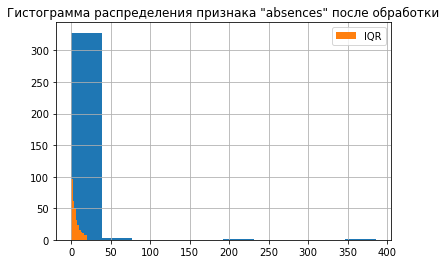

In [938]:
quan('absences')

In [939]:
stud = stud.loc[stud.absences <= 100]

## Вывод по столбцу 28. absences: Видно 2 выброса - 385 и 212 - убираем их (ограничение - прогулов не более 100). Медиана: 4.

## Столбец: 29. score: (количественный) — баллы по госэкзамену по математике

Характеристики до работы над устранением потенциальных выбросов:


count    326.000000
mean      52.147239
std       22.401712
min        0.000000
25%       41.250000
50%       55.000000
75%       65.000000
max      100.000000
Name: score, dtype: float64

25-й перцентиль: 41.25, 75-й перцентиль: 65.0, IQR: 23.75,  Границы выбросов: [5.625, 100.625].

Возможные характеристики после работы над устранением потенциальных выбросов:


count    296.000000
mean      57.432432
std       15.757554
min       20.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

0      30.0
1      30.0
2      50.0
3      75.0
4      50.0
       ... 
388    40.0
391    80.0
392    35.0
393    50.0
394    45.0
Name: score, Length: 296, dtype: float64

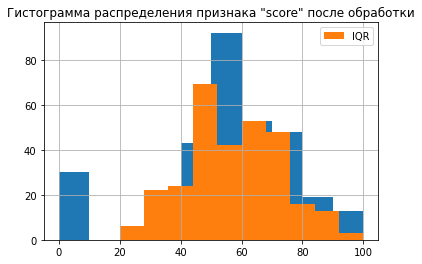

In [940]:
quan('score')

## Вывод по столбцу 29. score: Автоматическое устранение выбросов использовать не будем, так как значение score - именно то, которое нам нужно оценивать и логично, что баллов может быть от 0 до 100 (как и есть в нашем датасете). Медиана: 55.

# ВЫВОДЫ по разделу I: 
После обработки данных - вместо 395 строк осталось (за счет чистки от выбросов - 331 строка)

## 13 параметров (столбцов) - количественных: 
age, Medu, Fedu, traveltime, studytime, failures, st_granular, famrel,
freetime, goout, health, absences, score.

## 17 параметров (столбцов) - номинативных: 
school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, 
schoolsup, famsup, paid, activities, nursery, higher, internet, romantic.

# Раздел II-1: Корреляционный анализ для количественных переменных

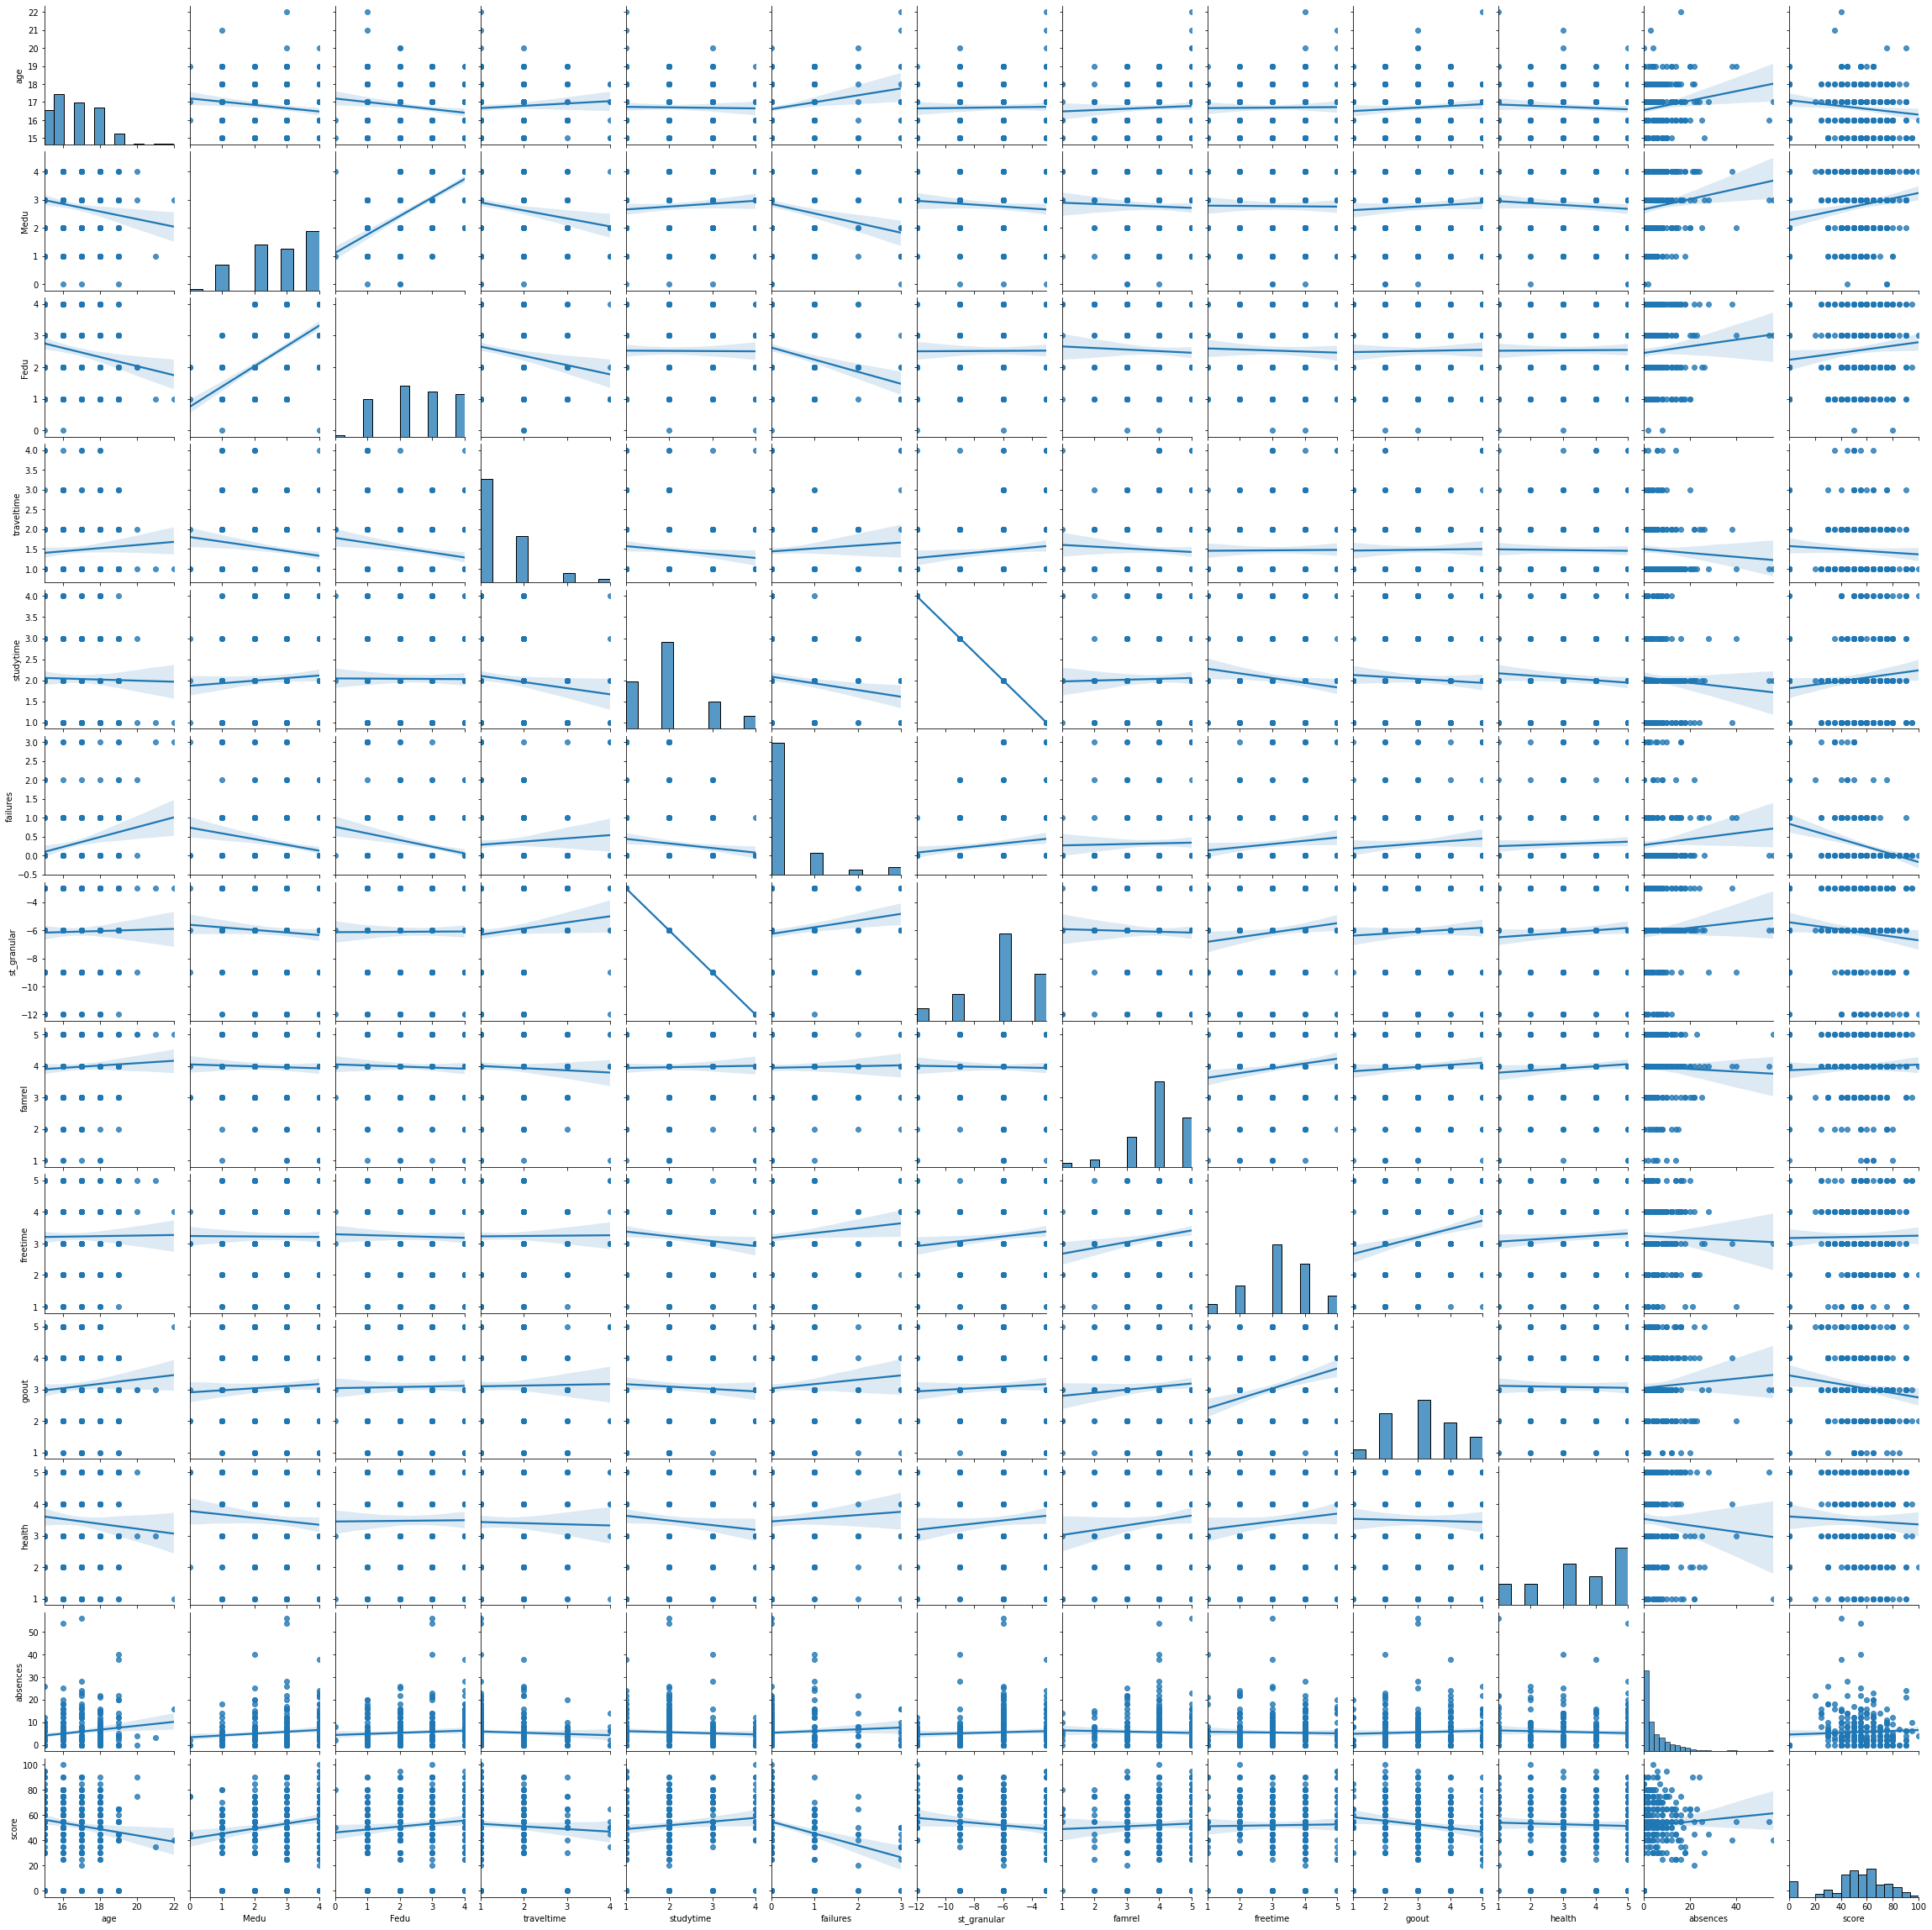

In [941]:
sns.pairplot(stud, kind = 'reg')

В силу большого количества количественных переменных график в большинстве своем усложняет процесс анализа, поэтому используем матрицу корреляций:

In [942]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,st_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.156230,-0.168238,0.071708,-0.019213,0.223545,0.019213,0.053071,0.011246,0.081128,-0.071476,0.150496,-0.140704
Medu,-0.156230,1.000000,0.649339,-0.183575,0.079136,-0.227670,-0.079136,-0.037540,-0.007904,0.065083,-0.086337,0.122147,0.196428
Fedu,-0.168238,0.649339,1.000000,-0.190456,-0.005535,-0.259644,0.005535,-0.041272,-0.030685,0.018502,0.008007,0.070776,0.114783
traveltime,0.071708,-0.183575,-0.190456,1.000000,-0.120655,0.079594,0.120655,-0.056083,0.008059,0.015462,-0.018394,-0.052200,-0.066046
studytime,-0.019213,0.079136,-0.005535,-0.120655,1.000000,-0.138769,-1.000000,0.021930,-0.129990,-0.060053,-0.090732,-0.055309,0.112442
failures,0.223545,-0.227670,-0.259644,0.079594,-0.138769,1.000000,0.138769,0.021821,0.114783,0.094840,0.054503,0.077784,-0.308892
st_granular,0.019213,-0.079136,0.005535,0.120655,-1.000000,0.138769,1.000000,-0.021930,0.129990,0.060053,0.090732,0.055309,-0.112442
famrel,0.053071,-0.037540,-0.041272,-0.056083,0.021930,0.021821,-0.021930,1.000000,0.167052,0.080827,0.101424,-0.034116,0.044338
freetime,0.011246,-0.007904,-0.030685,0.008059,-0.129990,0.114783,0.129990,0.167052,1.000000,0.288308,0.089649,-0.024020,0.016692
goout,0.081128,0.065083,0.018502,0.015462,-0.060053,0.094840,0.060053,0.080827,0.288308,1.000000,-0.020271,0.050191,-0.142237


Среди всех значений видно, что st_granular и studytime - полностью скоррелированы с противоположным знаком (корреляция = -1). Значит, можно исключить один параметр - st_granular.

Тогда для значения score останутся 11 параметров: age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, health, absences,

В качестве промежуточных выводов можно отметить: 

а) на score большее влияние оказывает образование матери, чем отца;
б) чем больше тратится времени на путь до школы - тем хуже score;
в) score тем ниже, чем выше возраст;
г) самое сильное влияние (негативное) на score оказывает количество ошибок failures.

# Раздел II-2: Анализ номинативных переменных

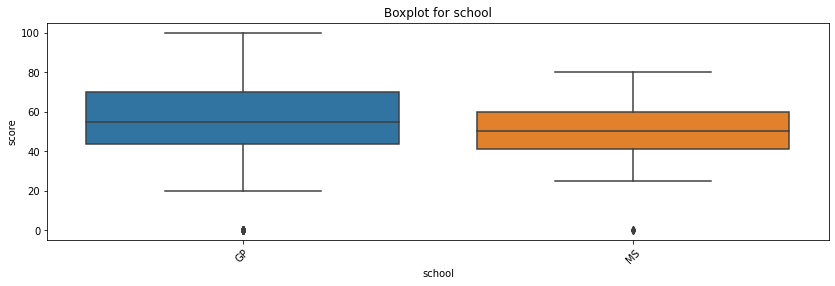

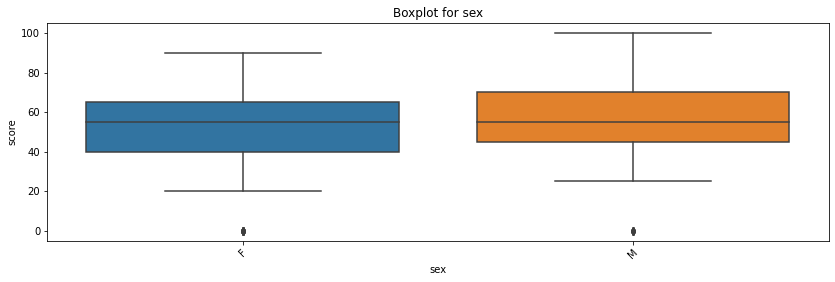

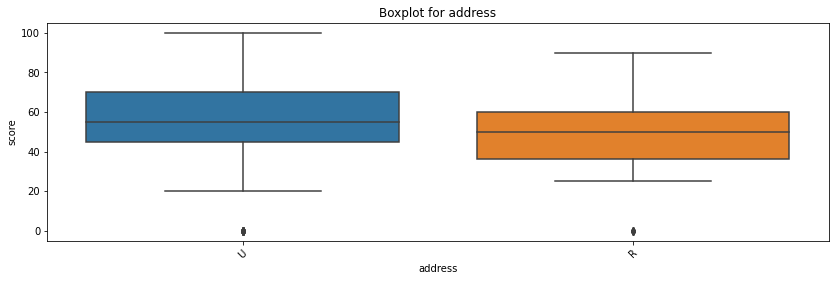

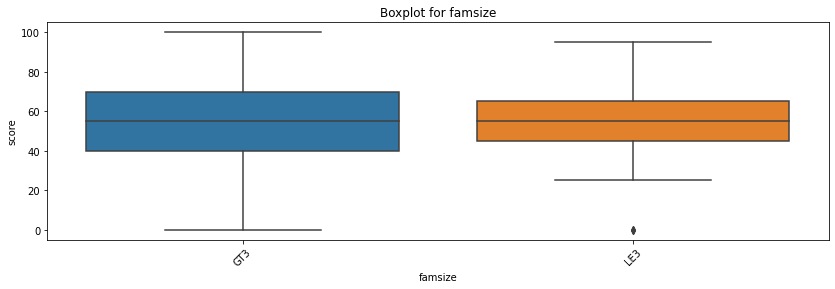

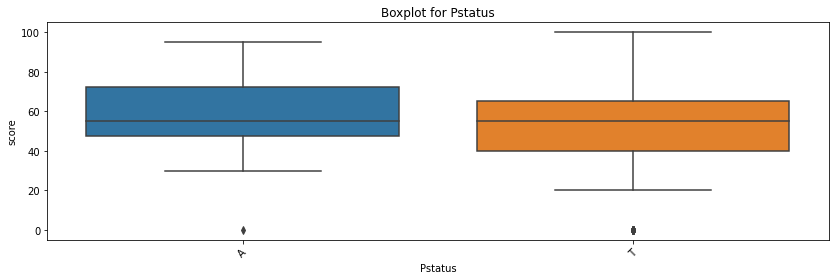

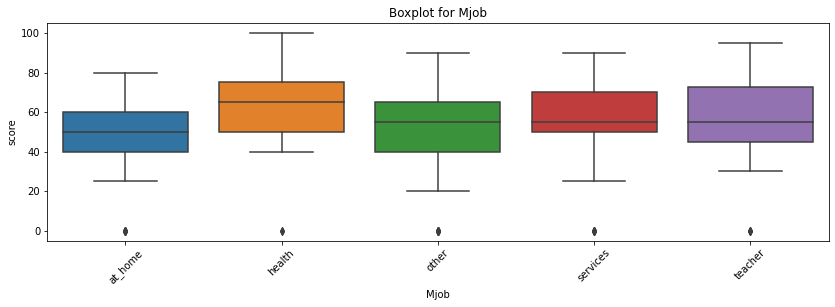

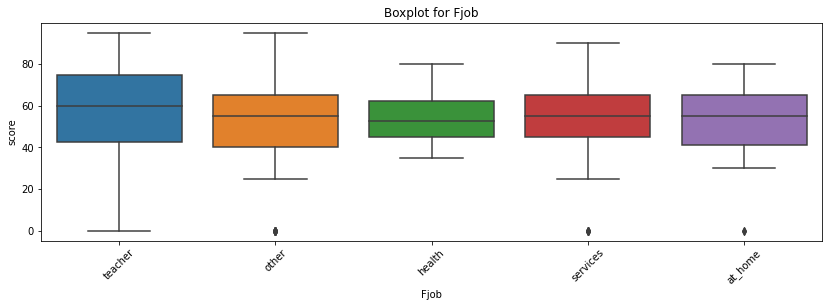

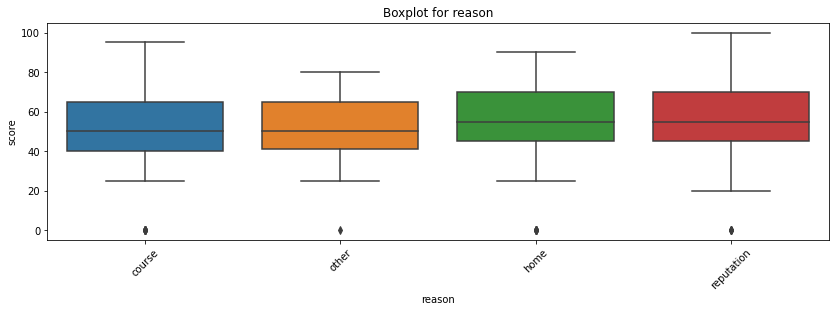

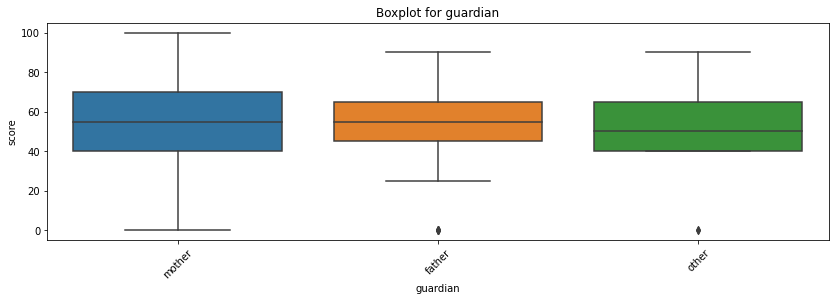

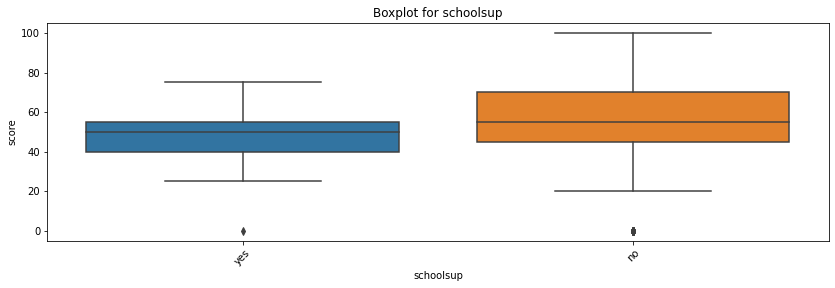

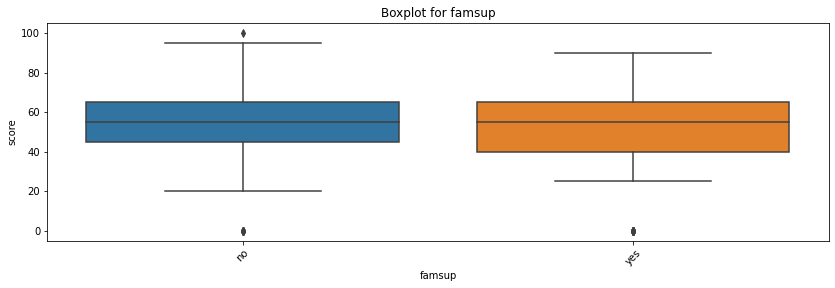

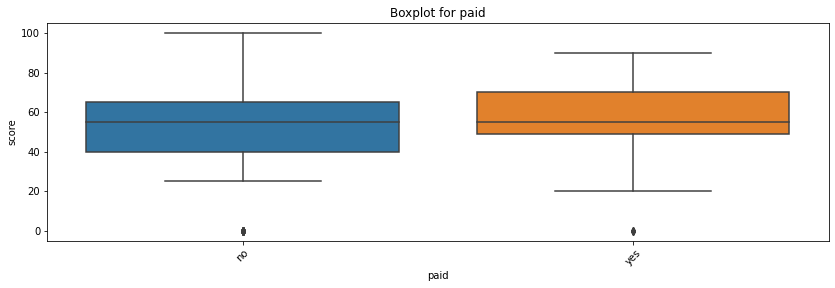

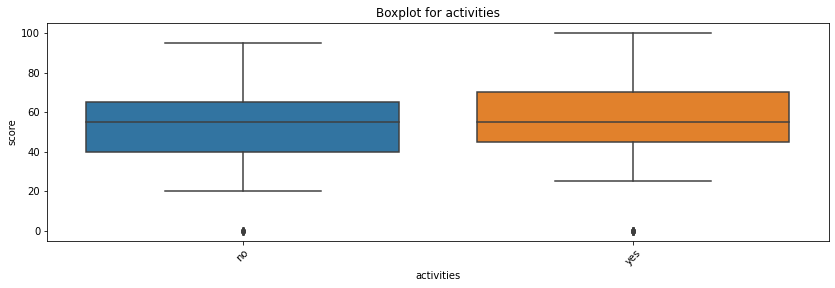

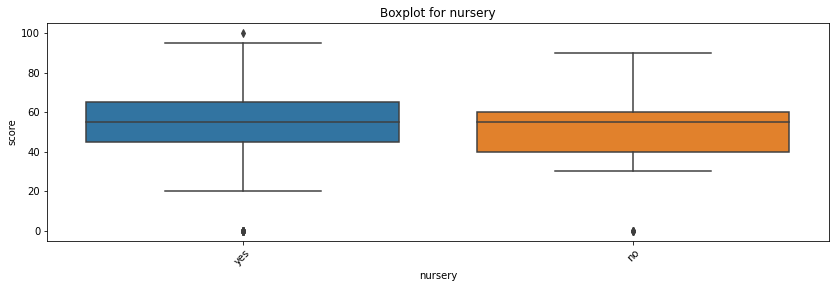

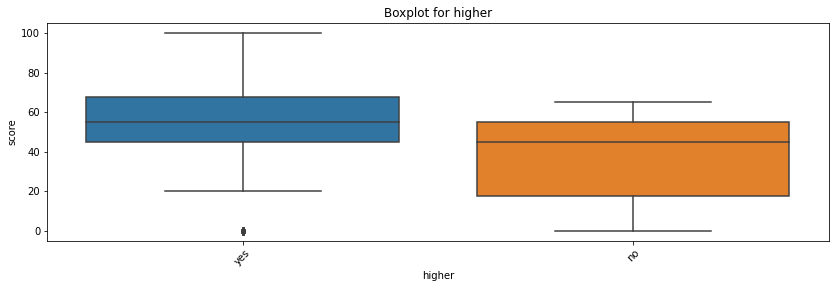

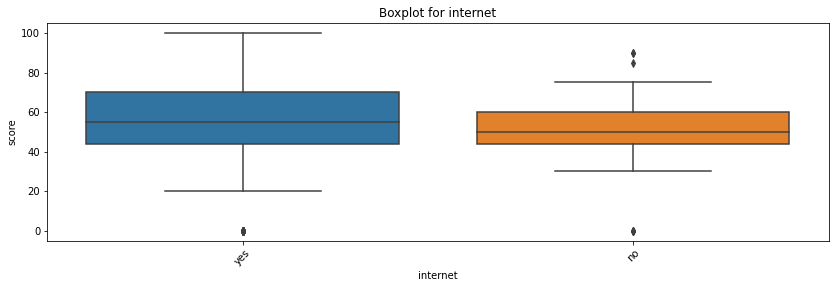

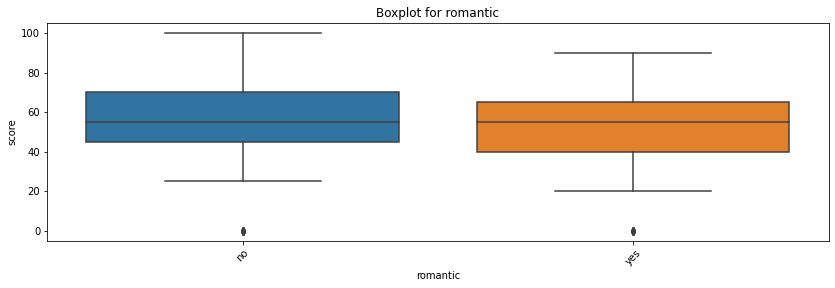

In [943]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus',
            'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic']:
    get_boxplot(col)

По графикам достаточно трудно определить, какие из значений оказывают влияние на score (только у 4 графиков значений больше, чем 2), кажется, что графический метод говорит о влиянии всех параметров на значение score. Но подключим методы статистики (проведем тест Стьюдента с нулевой гипотезой, что распределние баллов (score) по различным номинативным параметрам неразличимы):

In [944]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus',
            'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
            'famsup', 'paid', 'activities', 'nursery', 'higher',
            'internet', 'romantic']:
    display(get_stat_dif(col))

None

None

None

None

None

None

None

None

None

None

None

None

None

None

None

None

None

Как видно - нет серьезно отличающихся параметров (при уровне значимости альфа = 0.05, с учетом поправки Бонферони). Если же увеличить уровень значимости альфа с 0.05 до 0.10 - тогда появляется 1 колонка, которую надо будет учитывать - Mjob (но это лишь показывает, что ошибки в написании кода нет). Тогда, получается, что ни 1 из номинативных параметров можно не оставлять в датасете для дальнейшего построения модели.

# ВЫВОДЫ по Разделу II: 
Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на количество баллов (score) это 11 количественных параметров: 
age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, health, absences.

In [945]:
stud_for_model = stud.loc[:, ['age', 'Medu', 'Fedu', 'traveltime',
                              'studytime','failures', 'famrel', 
                              'freetime', 'goout', 'health', 
                              'absences']]
stud_for_model.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences
0,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0
1,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0
2,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0
3,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0
4,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0


# ИТОГИ по Проекту разведывательного анализа данных для модели предсказывания результатов экзаменов по математике:
1) Данные заполнены более-менее нормально (хуже всего у параметра Pstatus - заполнено 350 значений из 395 строк);

2) Из 30 столбцов реальные выбросы (а не по системе автоматического определения через IQR) имелись только в 3 столбцах: famrel (семейные отношения), Fedu (образование отца), absences (пропущенные занятия). Это говорит о достаточно чистых данных в датасете.

3) Самое сильное влияние (негативное) на score оказывает количество ошибок failures, а образование матери в большей степени влияет на score, чем образование отца.

4) Ни 1 из номинативных параметров не будет являться важным параметром, который будет нужно учитывать при дальнейшем построении модели (это определено посредством проведения теста Стьюдента с нулевой гипотезой о том, что распределние баллов (score) по различным номинативным параметрам неразличимы - и эта гипотеза подтвердилась). 

5) Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это 11 количественных параметров: age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime, goout, health, absences.